In [2]:
import glob
import os, sys
import random
from tqdm import tqdm

import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marianaflores8124","key":"48ed7e585269f96a4dafbbfb279bdf6b"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 95% 257M/271M [00:02<00:00, 89.5MB/s]
100% 271M/271M [00:02<00:00, 95.0MB/s]
 97% 529M/544M [00:05<00:00, 134MB/s]
100% 544M/544M [00:05<00:00, 106MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 79.9MB/s]


In [0]:
import zipfile
import os, shutil
import pandas as pd
from PIL import Image
import random


for file in os.listdir():
 if file.endswith('.zip'):
  zip_ref = zipfile.ZipFile(file, 'r')
  zip_ref.extractall()
  zip_ref.close()

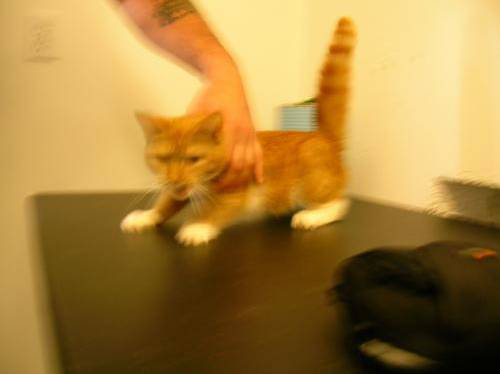

In [62]:
root_path = '/content'
Image.open(root_path+'/train/'+'cat.0.jpg')

In [0]:
# Please correct the urls accordingly

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/train/'

# The directory where we will
# store our smaller dataset
base_dir = '/content/data1'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [0]:
# Copy first 100 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 50 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 100 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(100, 150)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 50 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(150, 200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

**Image preprocessing**


In [92]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [94]:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break






data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 2)


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**VGG16 GENERATOR**

In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16() 


In [0]:
img_shape = (150, 150, 3)
vgg16_model=VGG16(input_shape=img_shape,include_top=False, weights='imagenet')

In [0]:
vgg16_model.trainable=False
global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(2,activation='softmax')

In [0]:
model = models.Sequential([
  vgg16_model,
  global_average_layer,
  prediction_layer
])

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])



In [126]:
history = model.fit(train_generator,
                    epochs=4, 
                    steps_per_epoch=20,
                    validation_steps=20,
                    validation_data=validation_generator)

Epoch 1/4
20/20 [==============================] - 3s 173ms/step - loss: 0.5369 - acc: 0.7625 - val_loss: 0.5266 - val_acc: 0.8100
Epoch 2/4
20/20 [==============================] - 3s 125ms/step - loss: 0.5241 - acc: 0.7825 - val_loss: 0.5074 - val_acc: 0.8500
Epoch 3/4
20/20 [==============================] - 2s 122ms/step - loss: 0.5153 - acc: 0.7875 - val_loss: 0.5237 - val_acc: 0.7600
Epoch 4/4
20/20 [==============================] - 2s 125ms/step - loss: 0.5022 - acc: 0.7950 - val_loss: 0.4940 - val_acc: 0.8400


In [119]:
from keras.preprocessing.image import load_img
image=load_img(root_path+'/train/'+'dog.91.jpg', target_size=(150,150))

from keras.preprocessing.image import img_to_array
image=img_to_array(image)

image=image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
from keras.applications.vgg16 import preprocess_input
image=preprocess_input(image)
yhat=model.predict(image)
print(yhat)


[[2.067663e-12 1.000000e+00]]


**RESNET-50**


In [127]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

img_shape = (150, 150, 3)
resnet50_model=ResNet50(input_shape=img_shape,include_top=False, weights='imagenet')
resnet50_model.trainable=False
global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(2,activation='softmax')

model = models.Sequential([
  resnet50_model,
  global_average_layer,
  prediction_layer
])

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=4, 
                    steps_per_epoch=20,
                    validation_steps=20,
                    validation_data=validation_generator)



/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step
Epoch 1/4
20/20 [==============================] - 6s 303ms/step - loss: 0.4369 - acc: 0.8025 - val_loss: 0.6976 - val_acc: 0.5100
Epoch 2/4
20/20 [==============================] - 2s 116ms/step - loss: 0.2024 - acc: 0.9375 - val_loss: 0.7047 - val_acc: 0.5000
Epoch 3/4
20/20 [==============================] - 2s 116ms/step - loss: 0.1579 - acc: 0.9550 - val_loss: 0.7096 - val_acc: 0.5000
Epoch 4/4
20/20 [==============================] - 2s 116ms/step - loss: 0.1194 - acc: 0.9775 - val_loss: 0.7110 - val_acc: 0.5000


In [129]:
from keras.preprocessing.image import load_img
image=load_img(root_path+'/train/'+'cat.91.jpg', target_size=(150,150))

from keras.preprocessing.image import img_to_array
image=img_to_array(image)

image=image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
from keras.applications.vgg16 import preprocess_input
image=preprocess_input(image)
yhat=model.predict(image)
print(yhat)

[[0.9982418  0.00175825]]


**GoogleLeNet**

In [130]:
pip install pillow numpy imageio

In [137]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions

img_shape = (150, 150, 3)
InceptionV3_model=InceptionV3(input_shape=img_shape,include_top=False, weights='imagenet')
InceptionV3_model.trainable=False
global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(2,activation='softmax')

model = models.Sequential([
  InceptionV3_model,
  global_average_layer,
  prediction_layer
])

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=4, 
                    steps_per_epoch=20,
                    validation_steps=20,
                    validation_data=validation_generator)


87916544/87910968 [==============================] - 2s 0us/step
Epoch 1/4
20/20 [==============================] - 9s 462ms/step - loss: 0.6538 - acc: 0.6350 - val_loss: 0.7317 - val_acc: 0.7100
Epoch 2/4
20/20 [==============================] - 2s 111ms/step - loss: 0.5295 - acc: 0.7275 - val_loss: 0.4493 - val_acc: 0.8500
Epoch 3/4
20/20 [==============================] - 2s 115ms/step - loss: 0.4623 - acc: 0.7925 - val_loss: 0.3336 - val_acc: 0.8800
Epoch 4/4
20/20 [==============================] - 2s 115ms/step - loss: 0.4053 - acc: 0.8350 - val_loss: 0.2920 - val_acc: 0.9100


In [142]:
from keras.preprocessing.image import load_img
image=load_img(root_path+'/train/'+'cat.987.jpg', target_size=(150,150))

from keras.preprocessing.image import img_to_array
image=img_to_array(image)

image=image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
from keras.applications.vgg16 import preprocess_input
image=preprocess_input(image)
yhat=model.predict(image)
print(yhat)

[[1.0000000e+00 1.4132015e-26]]
